In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import warnings
from dotenv import load_dotenv

import pandas as pd
import numpy as np

In [3]:
load_dotenv()
warnings.simplefilter(action='ignore', category=UserWarning)
sys.path.append(os.path.abspath(".."))

In [ ]:
path = "../data/proc/goal_selfReport_merged_filtered_wide.csv"

In [5]:
df = pd.read_csv(path)

In [8]:
df.head()

,ParticipantIdentifier,trial_date,DAILY_goal1_set,DAILY_goal2_set,DAILY_goal1_effort,DAILY_goal1_importance,DAILY_goal2_effort,DAILY_goal2_importance,DAILY_goal1_report,DAILY_goal2_report,DAILY_goal1_effort.1,DAILY_goal2_effort.1,day_diff
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,Keep working on psych paper,Finish chem prelab,5.0,6.0,3.0,5.0,71.0,100.0,5.0,3.0,1.0
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,Keep working on psych paper,Review bio questions,6.0,7.0,4.0,3.0,100.0,77.0,6.0,4.0,1.0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,Finish and hand in psych rough draft,Create quick bio lecture notes,5.0,5.0,6.0,5.0,100.0,100.0,5.0,6.0,1.0
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-04,Practice biology FSG questions,Catch up on anthropology readings,5.0,5.0,6.0,6.0,90.0,54.0,5.0,6.0,1.0
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05,Practice biology FSG questions,Continue reading anthropology,7.0,7.0,5.0,5.0,100.0,100.0,7.0,5.0,1.0


In [9]:
df.columns.to_list()

['ParticipantIdentifier',
 'trial_date',
 'DAILY_goal1_set',
 'DAILY_goal2_set',
 'DAILY_goal1_effort',
 'DAILY_goal1_importance',
 'DAILY_goal2_effort',
 'DAILY_goal2_importance',
 'DAILY_goal1_report',
 'DAILY_goal2_report',
 'DAILY_goal1_effort.1',
 'DAILY_goal2_effort.1',
 'day_diff']

In [10]:
labelDF = pd.read_csv("../data/proc/labelled_daily_goals_long.csv")

In [11]:
dfx = df[["ParticipantIdentifier", "trial_date", 
          "DAILY_goal1_effort", "DAILY_goal2_effort", 
          "DAILY_goal1_report", "DAILY_goal2_report",
          "DAILY_goal1_set", "DAILY_goal2_set"
          ]]

In [12]:
dfx.head()

,ParticipantIdentifier,trial_date,DAILY_goal1_effort,DAILY_goal2_effort,DAILY_goal1_report,DAILY_goal2_report,DAILY_goal1_set,DAILY_goal2_set
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,5.0,3.0,71.0,100.0,Keep working on psych paper,Finish chem prelab
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,6.0,4.0,100.0,77.0,Keep working on psych paper,Review bio questions
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,5.0,6.0,100.0,100.0,Finish and hand in psych rough draft,Create quick bio lecture notes
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-04,5.0,6.0,90.0,54.0,Practice biology FSG questions,Catch up on anthropology readings
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05,7.0,5.0,100.0,100.0,Practice biology FSG questions,Continue reading anthropology


In [13]:
len(dfx)

7788

In [14]:
# 1) Melt effort columns
effort_long = df.melt(
    id_vars=["ParticipantIdentifier", "trial_date"],
    value_vars=["DAILY_goal1_effort", "DAILY_goal2_effort"],
    var_name="response_identifier",
    value_name="effort"
)

# Map column names to goal_1 / goal_2
effort_long["response_identifier"] = effort_long["response_identifier"].map({
    "DAILY_goal1_effort": "goal_1",
    "DAILY_goal2_effort": "goal_2"
})

# 2) Melt completion columns
completion_long = df.melt(
    id_vars=["ParticipantIdentifier", "trial_date"],
    value_vars=["DAILY_goal1_report", "DAILY_goal2_report"],
    var_name="response_identifier",
    value_name="completion"
)

completion_long["response_identifier"] = completion_long["response_identifier"].map({
    "DAILY_goal1_report": "goal_1",
    "DAILY_goal2_report": "goal_2"
})

# 3) Merge effort + completion into one long df
long_df = effort_long.merge(
    completion_long,
    on=["ParticipantIdentifier", "trial_date", "response_identifier"]
)

# Optional: sort rows
long_df = long_df.sort_values(["ParticipantIdentifier", "trial_date", "response_identifier"])

In [15]:
long_df = long_df.rename(columns={
    "response_identifier": "ResultIdentifier"
})

In [16]:
long_df.head()

,ParticipantIdentifier,trial_date,ResultIdentifier,effort,completion
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,goal_1,5.0,71.0
7788,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,goal_2,3.0,100.0
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,goal_1,6.0,100.0
7789,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,goal_2,4.0,77.0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,goal_1,5.0,100.0


In [17]:
labelDF = labelDF[["ParticipantIdentifier", "trial_date", "ResultIdentifier", "Answers", "label"]]
labelDF.head()

,ParticipantIdentifier,trial_date,ResultIdentifier,Answers,label
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,DAILY_goal1_set,Keep working on psych paper,School
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,DAILY_goal1_set,Keep working on psych paper,School
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,DAILY_goal1_set,Finish and hand in psych rough draft,School
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-04,DAILY_goal1_set,Practice biology FSG questions,School
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05,DAILY_goal1_set,Practice biology FSG questions,School


In [18]:
len(labelDF)

15575

In [19]:
labelDF["trial_date"] = pd.to_datetime(labelDF["trial_date"])

labelDF.head()

,ParticipantIdentifier,trial_date,ResultIdentifier,Answers,label
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,DAILY_goal1_set,Keep working on psych paper,School
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,DAILY_goal1_set,Keep working on psych paper,School
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,DAILY_goal1_set,Finish and hand in psych rough draft,School
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-04,DAILY_goal1_set,Practice biology FSG questions,School
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05,DAILY_goal1_set,Practice biology FSG questions,School


In [20]:
long_df["trial_date"] = pd.to_datetime(long_df["trial_date"])

In [21]:
long_df.head()

,ParticipantIdentifier,trial_date,ResultIdentifier,effort,completion
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,goal_1,5.0,71.0
7788,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,goal_2,3.0,100.0
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,goal_1,6.0,100.0
7789,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,goal_2,4.0,77.0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,goal_1,5.0,100.0


In [22]:
long_df["ResultIdentifier"] = long_df["ResultIdentifier"].map({
    "goal_1": "DAILY_goal1_set",
    "goal_2": "DAILY_goal2_set"
})

In [23]:
mergeDf = long_df.merge(labelDF, 
              on=["ParticipantIdentifier", "trial_date", "ResultIdentifier"],
              how="inner")

In [24]:
mergeDf.head()

,ParticipantIdentifier,trial_date,ResultIdentifier,effort,completion,Answers,label
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,DAILY_goal1_set,5.0,71.0,Keep working on psych paper,School
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,DAILY_goal2_set,3.0,100.0,Finish chem prelab,School
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,DAILY_goal1_set,6.0,100.0,Keep working on psych paper,School
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,DAILY_goal2_set,4.0,77.0,Review bio questions,School
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,DAILY_goal1_set,5.0,100.0,Finish and hand in psych rough draft,School


In [25]:
len(mergeDf)

15575

In [26]:
df_mean = (
    mergeDf
    .groupby("label", as_index=False)
    .agg(
        count=("effort", "size"),        # number of rows per label
        effort=("effort", "mean"),       # mean effort per label
        completion=("completion", "mean")# mean completion per label
    )
)

In [27]:
df_mean_sorted = (
    df_mean
    .sort_values(by="count", ascending=False)   # largest count first
    .reset_index(drop=True)
)

df_mean_sorted = df_mean_sorted.loc[df_mean_sorted['count'] >= 30]

print(df_mean_sorted)

                    label  count    effort  completion
0                  School   8437  5.522698   60.479080
1                Exercise    879  5.142207   64.745165
2                    Work    769  5.440832   69.453836
3   MentalPersonal_Health    720  5.129167   67.002778
4                    Diet    541  5.140481   66.064695
5                   Sleep    528  5.149621   69.229167
6               Housework    446  4.840807   60.376682
7                   Other    441  5.263039   67.113379
8                Learning    304  5.371711   45.832237
9                   Hobby    267  5.438202   61.378277
10        Time_Management    235  5.438298   58.204255
11            Social_life    194  5.237113   77.216495
12        Reading_leisure    192  5.187500   59.635417
13         Medical_Health    191  5.340314   73.560209
14                  Admin    185  5.389189   55.362162
15                Friends    161  5.397516   77.136646
16       Self-Improvement    156  5.641026   58.615385
17        

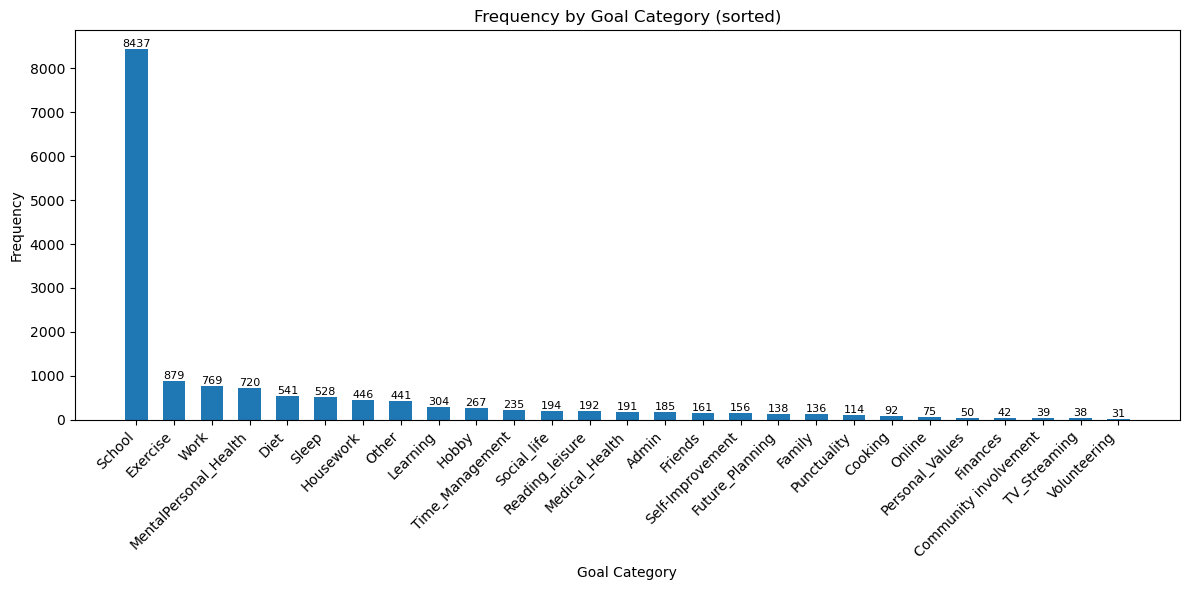

In [28]:
# --- Bar chart for Frequency, sorted by Frequency ---
df_eff = df_mean_sorted.sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_eff))  # numeric positions
bars = ax.bar(x, df_eff["count"], width=0.6)  # narrower bars = more visible spacing

ax.set_xticks(x)
ax.set_xticklabels(df_eff["label"], rotation=45, ha="right")
ax.set_ylabel("Frequency")
ax.set_xlabel("Goal Category")
ax.set_title("Frequency by Goal Category (sorted)")

# Add counts on top of each bar
for bar, count in zip(bars, df_eff["count"]):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,         # little bit above the bar
        str(count),
        ha="center",
        va="bottom",
        fontsize=8,
    )

fig.tight_layout()
plt.show()

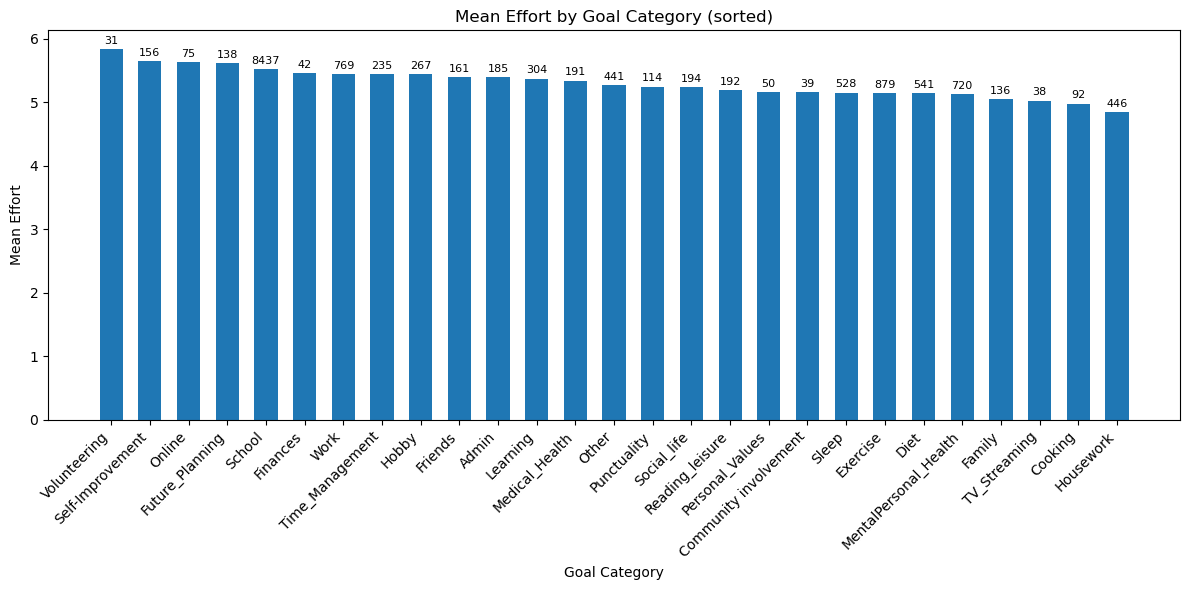

In [29]:
# --- Bar chart for effort, sorted by effort ---
df_eff = df_mean_sorted.sort_values("effort", ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_eff))  # numeric positions
bars = ax.bar(x, df_eff["effort"], width=0.6)  # narrower bars = more visible spacing

ax.set_xticks(x)
ax.set_xticklabels(df_eff["label"], rotation=45, ha="right")
ax.set_ylabel("Mean Effort")
ax.set_xlabel("Goal Category")
ax.set_title("Mean Effort by Goal Category (sorted)")

# Add counts on top of each bar
for bar, count in zip(bars, df_eff["count"]):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,         # little bit above the bar
        str(count),
        ha="center",
        va="bottom",
        fontsize=8,
    )

fig.tight_layout()
plt.show()

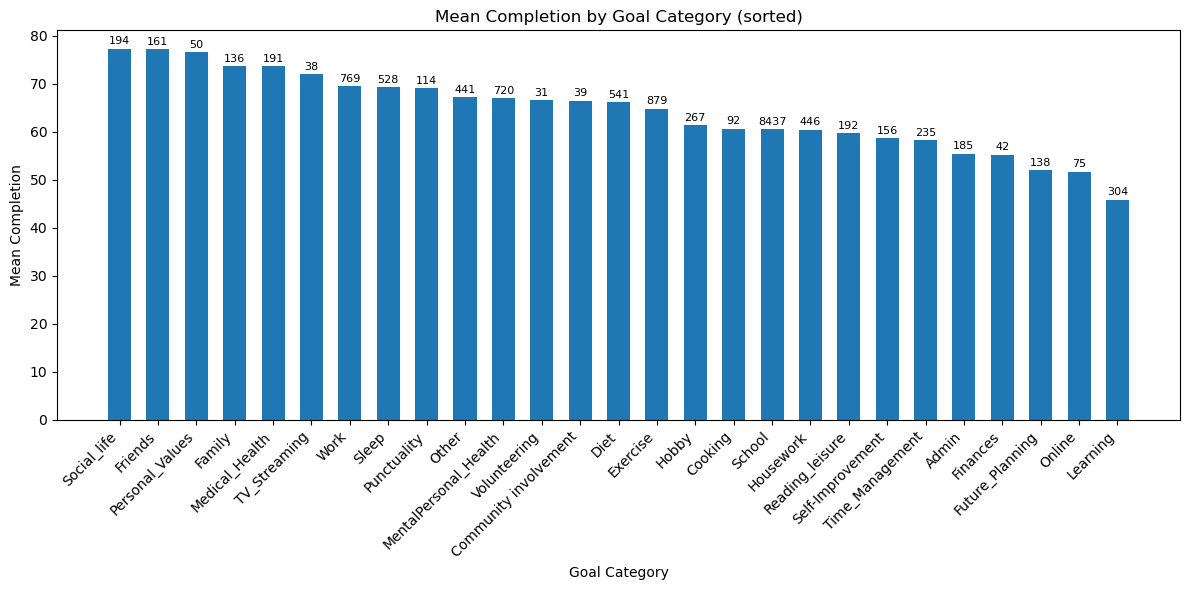

In [30]:
# --- Bar chart for completion, sorted by completion ---
df_comp = df_mean_sorted.sort_values("completion", ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_comp))
bars = ax.bar(x, df_comp["completion"], width=0.6)

ax.set_xticks(x)
ax.set_xticklabels(df_comp["label"], rotation=45, ha="right")
ax.set_ylabel("Mean Completion")
ax.set_xlabel("Goal Category")
ax.set_title("Mean Completion by Goal Category (sorted)")

# Add counts on top of each bar
for bar, count in zip(bars, df_comp["count"]):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,          # maybe a bit higher if completion is larger
        str(count),
        ha="center",
        va="bottom",
        fontsize=8,
    )

fig.tight_layout()
plt.show()